Paquetes necesarios

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

TAREA: Crea una imagen, p.e. 800x800, con la textura del tablero de ajedrez

(800, 800, 1)


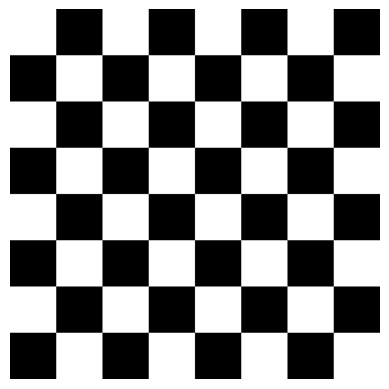

In [2]:
#Crea una imagen con tres planos
resolution = 800
ajedrez_img = np.zeros((resolution,resolution,1), dtype = np.uint8)

#Rellenamos el tablero
size = resolution//8
blanco = True
for i in range(8):
    for j in range(8):
        if blanco:
            ajedrez_img[i*size:(i + 1)*size, j *size:(j + 1)*size, 0] = 255
        blanco = not blanco
    blanco = not blanco 
    
#Dimensiones
print(ajedrez_img.shape)
plt.imshow(ajedrez_img, cmap='gray')
plt.axis('off')
plt.show()


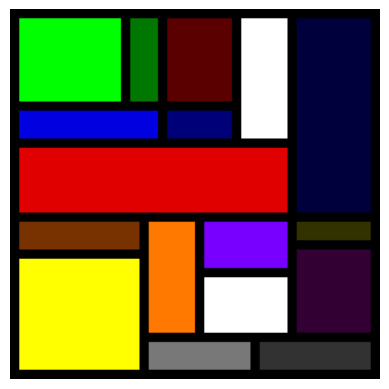

In [90]:
#Modifica el primer plano de color (Rojo, ya que es RGB)
# #color_img[:,:,1] = 200 #Prueba otras combinaciones
#color_img[:,:,2] = 255 

mondrian_img = np.zeros((200,200,3), dtype = np.uint8)
mondrian_img[:] = 0 

mondrian_img[5:50,5:60,1]=255 #verde
mondrian_img[55:70,5:80,2]=225 # azul
mondrian_img[5:50,65:80,1]=120 # verde oscuro
mondrian_img[5:50,85:120,0]=90 # rojo oscuro
mondrian_img[75:110,5:150,0]=225 #rojo
mondrian_img[5:110,155:195,2]=60 # azul marino
mondrian_img[5:70,125:150,:] = 255 #blanco
mondrian_img[115:130,5:70,:] = [120,50,0] #marrón
mondrian_img[115:175,75:100,:] = [255,120,0] #naranja
mondrian_img[135:195,5:70,:] = [255,255,0] #amarillo
mondrian_img[180:195,75:130,:] = 120 #gris
mondrian_img[180:195,135:195,:] = 50 #gris oscuro
mondrian_img[115:125,155:195,:] = [50,50,0] #amarillo oscuro
mondrian_img[115:140,105:150,:] = [120,0,255] #morado
mondrian_img[130:175,155:195,:] = [50,0,50] # morado oscuro
mondrian_img[145:175,105:150,:] = 255 #morado
mondrian_img[55:70,85:120,2]=120 # azul oscuro

plt.imshow(mondrian_img) 
plt.axis('off')
plt.show()

TAREA: Crear una imagen estilo Mondrian (un ejemplo https://www3.gobiernodecanarias.org/medusa/ecoescuela/sa/2017/04/17/descubriendo-a-mondrian/ )

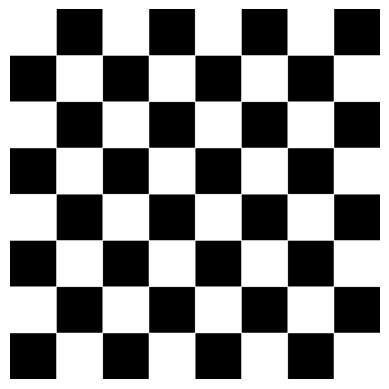

True

In [91]:
resolution = 800
ajedrez_img2 = np.zeros((resolution,resolution,1), dtype = np.uint8)

size = resolution//8
blanco = True
for i in range(8):
    for j in range(8):
        if blanco:
            cv2.rectangle(ajedrez_img2,(j*size,i*size),((j+1)*size,(i+1)*size),(255,255,255),-1)
        blanco = not blanco
    blanco = not blanco 

#Visualiza sin especificar el mapa de color gris
plt.imshow(ajedrez_img2, cmap='gray')
plt.axis('off')
plt.show()
#Salva la imagen resultante a disco
cv2.imwrite('imagen.jpg', ajedrez_img2)

TAREA: Resuelve una de las tareas previas (a elegir) con las funciones de dibujo de OpenCV  :)

In [3]:
vid = cv2.VideoCapture(0)
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        #Separamos canales
        b = frame[:,:,0]
        g = frame[:,:,1]
        r = frame[:,:,2]
        #Dimensiones
        h, w, c = frame.shape
        
       # Rotación de 90 grados al canal verde (G)
        M = cv2.getRotationMatrix2D((w/2, h/2), 90, 1)
        rotated_green = cv2.warpAffine(g, M, (w, h))

        #Concateamos en horizontal los tres planos del fotograma
        collage = np.hstack((-r, rotated_green, b))
    
        # Muestra fotograma redimensionando a la mitad para que quepa en pantalla
        cv2.imshow('Cam3', cv2.resize(collage, (int(w*1.5),int(h/2)),cv2.INTER_NEAREST))
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA: Modifica de alguna forma los valores de un plano de la imagen

Evento de ratón para mostrar el valor RGB del píxel

In [4]:
# Función que trata eventos de ratón 
def mouse_events(event, x, y, flags, params):
    global px, py, R, G, B
    px = -1
    # Movimiento del puntero     
    if event==cv2.EVENT_MOUSEMOVE:
        #Valores del píxel
        B = frame[y, x, 0]
        G = frame[y, x, 1]
        R = frame[y, x, 2]  

        px = x
        py = y

     
  

In [5]:
vid = cv2.VideoCapture(0)

# Tipografía para mostrar texto
font = cv2.FONT_HERSHEY_SIMPLEX
  
lanzado = 0
px = -1
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret: 
        # Activa em manejador en el primer fotograma
        if lanzado == 0:
            # Muestra fotograma
            cv2.imshow('Cam', frame)   
            # Define el nombre del manejador del evento
            cv2.setMouseCallback('Cam', mouse_events)
            lanzado = 1
            
        
        #Encuentra el pixel más claro y el más oscuro de la imagen
        min_brightness = np.min(frame)
        max_brightness = np.max(frame)

        # Encuentra las coordenadas del píxel más claro y más oscuro
        min_coord = np.argwhere(frame == min_brightness)[0]
        max_coord = np.argwhere(frame == max_brightness)[0]

        # Dibuja circunferencia en la coordenada del píxel más claro
        cv2.circle(frame, (max_coord[1], max_coord[0]), 10, (0, 0, 255), 1)  # Rojo
        # Dibuja circunferencia en la coordenada del píxel más oscuro
        cv2.circle(frame, (min_coord[1], min_coord[0]), 10, (255, 0, 0), 1)  # Azul

        # Obtiene los valores medios en las zonas 8x8
        square_size = 8
        h, w, _ = frame.shape
        avg_colors = []
        for y in range(0, h, square_size):
            for x in range(0, w, square_size):
                window = frame[y:y+square_size, x:x+square_size]
                avg_color = np.mean(window, axis=(0, 1))
                avg_colors.append((avg_color, (x, y)))

        # Encuentra la ventana más clara y la más oscura
        min_avg_color, min_coord = min(avg_colors, key=lambda x: np.mean(x[0]))
        max_avg_color, max_coord = max(avg_colors, key=lambda x: np.mean(x[0]))

        # Dibuja cuadrado alrededor de la zona más clara
        min_x, min_y = min_coord
        cv2.rectangle(frame, (min_x, min_y), (min_x + square_size, min_y + square_size), (255, 0, 0), 1)  

        # Dibuja cuadrado alrededor de la zona más oscura
        max_x, max_y = max_coord
        cv2.rectangle(frame, (max_x, max_y), (max_x + square_size, max_y + square_size), (0, 0, 255), 1)  

        # Muestra valores RGB intentando centrar en el puntero
        if px > -1:
            cv2.putText(frame, '{}'.format(R), (px-45,py-5), font, 0.5, (0, 0, 255), 1)
            cv2.putText(frame, '     {}'.format(G), (px-54,py-5), font, 0.5, (0, 255, 0), 1)
            cv2.putText(frame, '         {}'.format(B), (px-54,py-5), font, 0.5, (255, 0, 0), 1)
            
        cv2.imshow('Cam', frame)   
        
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA:
Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen 
¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?

In [9]:
import cv2
import numpy as np

vid = cv2.VideoCapture(0)

#Dimensiones de la cámara
w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

#Fuerzo a mitad de resolución para ocupar menos pantalla
w = int(w / 2)
h = int(h / 2)
vid.set(cv2.CAP_PROP_FRAME_WIDTH, w)
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, h)

#Imagen conjunta 3x original
collage = np.zeros((h * 3, w * 3, 3), dtype=np.uint8)
tl = collage[0:h, 0:w]
tc = collage[0:h, w:w + w]
tr = collage[0:h, w + w:w + w + w]
ml = collage[h:h + h, 0:w]
mc = collage[h:h + h, w:w + w]
mr = collage[h:h + h, w + w:w + w + w]
bl = collage[h + h:h + h + h, 0:w]
bc = collage[h + h:h + h + h, w:w + w]
br = collage[h + h:h + h + h, w + w:w + w + w]

while True:
    # fotograma a fotograma
    ret, frameIN = vid.read()
    
    #Menor tamaño
    frame = cv2.resize(frameIN, (w, h), cv2.INTER_NEAREST)

    if ret:
        
        #Separamos canales
        r = frame[:, :, 2]
        g = frame[:, :, 1]
        b = frame[:, :, 0]



        #Jugamos
        tl[:, :, 0] = b
        tl[:, :, 1] = g
        tl[:, :, 2] = r

        tc[:, :, 0] = 255 - r
        tc[:, :, 1] = g
        tc[:, :, 2] = b

        tr[:, :, 0] = r
        tr[:, :, 1] = 240 - g
        tr[:, :, 2] = 255 - b
        
        ml[:, :, 0] = r
        ml[:, :, 1] = 255 - b
        ml[:, :, 2] = g

        mc[:, :, 0] = 255-b
        mc[:, :, 1] = g
        mc[:, :, 2] = 255-r
        
        mr[:, :, 0] = 240-b
        mr[:, :, 1] = 255
        mr[:, :, 2] = 255

        bl[:, :, 0] = r
        bl[:, :, 1] = g
        bl[:, :, 2] = 255 - b

        bc[:, :, 0] = 255 - b
        bc[:, :, 1] = 255 - g
        bc[:, :, 2] = 255 - r
        
        br[:, :, 0] = 255
        br[:, :, 1] = g
        br[:, :, 2] = 255
        

        # Muestra composicion
        cv2.imshow('Cam', collage)
        
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break

# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA: Haz tu propuesta pop art